In [1]:
# ---------------------------
# 1. Import necessary libraries
# ---------------------------
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# ---------------------------
# 2. Generate synthetic training data
# ---------------------------
train_samples = []
train_labels = []

# 5% of younger individuals (13–64) who DID experience side effects → label 1
# 5% of older individuals (65–100) who did NOT experience side effects → label 0
for _ in range(50):
    train_samples.append(randint(13, 64))
    train_labels.append(1)
    train_samples.append(randint(65, 100))
    train_labels.append(0)

# 95% of younger individuals who did NOT experience side effects → label 0
# 95% of older individuals who DID experience side effects → label 1
for _ in range(1000):
    train_samples.append(randint(13, 64))
    train_labels.append(0)
    train_samples.append(randint(65, 100))
    train_labels.append(1)

# Convert to NumPy arrays and shuffle
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels, train_samples = shuffle(train_labels, train_samples)

# ---------------------------
# 3. Scale the training data (ages) between 0 and 1
# ---------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

# ---------------------------
# 4. Define a binary classification model
# ---------------------------
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')  # Use sigmoid for binary classification
])

# ---------------------------
# 5. Compile the model
# ---------------------------
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ---------------------------
# 6. Handle class imbalance using class weights
# ---------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weight_dict = dict(enumerate(class_weights))

# ---------------------------
# 7. Train the model
# ---------------------------
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=30,
    shuffle=True,
    class_weight=class_weight_dict,
    verbose=2
)

# ---------------------------
# 8. Generate synthetic test data
# ---------------------------
test_samples = []
test_labels = []

# 5% of younger individuals who did experience side effects
# 5% of older individuals who did NOT experience side effects
for _ in range(50):
    test_samples.append(randint(13, 64))
    test_labels.append(1)
    test_samples.append(randint(65, 100))
    test_labels.append(0)

# 95% of younger individuals who did NOT experience side effects
# 95% of older individuals who DID experience side effects
for _ in range(200):
    test_samples.append(randint(13, 64))
    test_labels.append(0)
    test_samples.append(randint(65, 100))
    test_labels.append(1)

test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_labels, test_samples = shuffle(test_labels, test_samples)

# ---------------------------
# 9. Scale test data using the same scaler from training
# ---------------------------
scaled_test_samples = scaler.transform(test_samples.reshape(-1, 1))

# ---------------------------
# 10. Predict using the trained model
# ---------------------------
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

# Convert probabilities to binary class labels (0 or 1)
rounded_predictions = np.round(predictions).astype(int)

# ---------------------------
# 11. Display some predictions vs actual
# ---------------------------
print("\nSample Predictions:")
for i in range(10):
    print(f"Age: {test_samples[i]}, Predicted: {rounded_predictions[i][0]}, Actual: {test_labels[i]}")


Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


189/189 - 0s - 2ms/step - accuracy: 0.5376 - loss: 0.6765 - val_accuracy: 0.5571 - val_loss: 0.6755
Epoch 2/30
189/189 - 0s - 419us/step - accuracy: 0.6116 - loss: 0.6659 - val_accuracy: 0.5905 - val_loss: 0.6661
Epoch 3/30
189/189 - 0s - 406us/step - accuracy: 0.6651 - loss: 0.6536 - val_accuracy: 0.6095 - val_loss: 0.6556
Epoch 4/30
189/189 - 0s - 410us/step - accuracy: 0.6995 - loss: 0.6392 - val_accuracy: 0.6476 - val_loss: 0.6431
Epoch 5/30
189/189 - 0s - 401us/step - accuracy: 0.7217 - loss: 0.6245 - val_accuracy: 0.6762 - val_loss: 0.6307
Epoch 6/30
189/189 - 0s - 508us/step - accuracy: 0.7312 - loss: 0.6088 - val_accuracy: 0.6762 - val_loss: 0.6176
Epoch 7/30
189/189 - 0s - 379us/step - accuracy: 0.7460 - loss: 0.5925 - val_accuracy: 0.6762 - val_loss: 0.6040
Epoch 8/30
189/189 - 0s - 379us/step - accuracy: 0.7614 - loss: 0.5757 - val_accuracy: 0.7095 - val_loss: 0.5899
Epoch 9/30
189/189 - 0s - 381us/step - accuracy: 0.7709 - loss: 0.5587 - val_accuracy: 0.7286 - val_loss: 0.5

In [2]:
# ---------------------------
# 12. Import for confusion matrix
# ---------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Flatten arrays for sklearn
y_true = test_labels
y_pred = rounded_predictions.flatten()

# ---------------------------
# 13. Generate confusion matrix
# ---------------------------
cm = confusion_matrix(y_true, y_pred)

# Print as text
print("\nConfusion Matrix:")
print(cm)

# Optional: print precision, recall, f1-score
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Optional: plot the confusion matrix
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Side Effect", "Side Effect"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



Confusion Matrix:
[[189  61]
 [ 47 203]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       250
           1       0.77      0.81      0.79       250

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.78      0.78       500



ModuleNotFoundError: No module named 'matplotlib'

In [4]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [6]:
cm= confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:.2f}" if normalize else f"{cm[i, j]}",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[189  61]
 [ 47 203]]


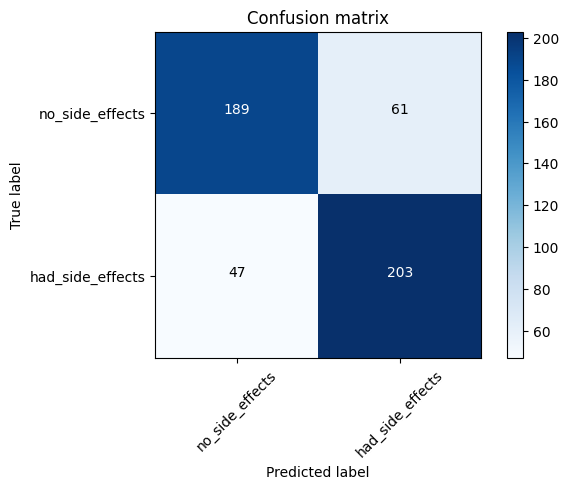

In [10]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,title='Confusion matrix')

### Save and load  Model

### 1. Model save

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,829 (7.15 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,220 (4.77 KB)

In [17]:
import os

model_path = '/Users/utkarshchandra/Documents/Machine Leraning /Learning  Keras with TensorFlow/medical_trail_model.keras'

# Check if the model file already exists
if not os.path.isfile(model_path):
    model.save(model_path)
    print("Model saved.")
else:
    print("Model already exists. Skipping save.")


Model saved.


In [18]:
from tensorflow.keras.models import load_model 
new_model = load_model('/Users/utkarshchandra/Documents/Machine Leraning /Learning  Keras with TensorFlow/medical_trail_model.keras')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [19]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,220 (4.77 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 611 (2.39 KB)

In [20]:
new_model.get_weights()

[array([[-0.33953255, -0.14633292, -0.5787894 , -0.46479243,  0.73545873,
         -0.30794007, -0.1272532 , -0.10688952,  0.5741398 ,  0.2935298 ,
         -0.19385174, -0.23299077, -0.1724715 , -0.3159842 , -0.30616304,
          0.6138306 ]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        , -0.18563351,
         0.        ,  0.        ,  0.        , -0.0115894 , -0.09718819,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.14504653], dtype=float32),
 array([[ 2.10509896e-02,  3.39706272e-01, -1.46590278e-01,
         -3.02182704e-01, -2.23614991e-01,  2.11212009e-01,
         -3.26172531e-01,  2.54179806e-01,  3.49826843e-01,
          7.74663985e-02, -1.70231164e-02, -2.46264458e-01,
         -3.23694110e-01,  7.11363852e-02, -3.53147000e-01,
         -5.90400696e-02, -3.26809525e-01,  2.00430781e-01,
         -2.35846341e-01, -1.45291820e-01, -2.37768501e-01,
         -1.01130337e-01, -2.90990174e-02, -7.19884932e-02,
 

In [21]:
new_model.optimizer